# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
ds = pd.read_csv("Analysis of Super Store - DA.csv")
ds.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
ds.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# Remove unnecessary columns


In [4]:
#Since this dataset is for the country US and doesn't help in analysis we can remove the country column.
#We can also remove the postal code column since it is of no value to us

ds.drop(["Postal Code", "Country"], inplace = True, axis = 1)

In [5]:
ds.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Details of the numeric columns

In [6]:
ds.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# Check for the unique values of columns

In [7]:
for c in ds.columns:
    if ds[c].dtype == object:
        x = ds[c].unique().size
        if x<20:
            print(c,": ", ds[c].unique(),"\n")

Ship Mode :  ['Second Class' 'Standard Class' 'First Class' 'Same Day'] 

Segment :  ['Consumer' 'Corporate' 'Home Office'] 

Region :  ['South' 'West' 'Central' 'East'] 

Category :  ['Furniture' 'Office Supplies' 'Technology'] 

Sub-Category :  ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers'] 



# Check for empty values corresponding to each column

In [8]:
ds.isna().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Visualization and comparison of sales and profits based on different parameters 

<AxesSubplot:xlabel='Segment'>

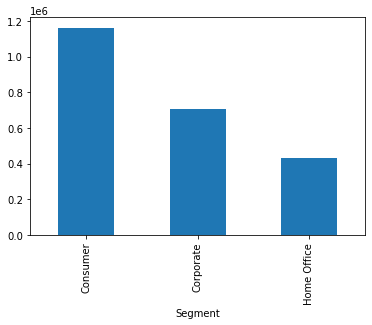

In [9]:
ds.groupby("Segment")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='Segment'>

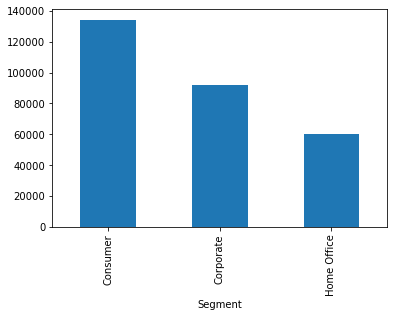

In [10]:
ds.groupby("Segment")["Profit"].sum().plot.bar()

In [11]:
#The amount of sales and profits seam proportionate with regards to the segment. No special insights here

<AxesSubplot:xlabel='Region'>

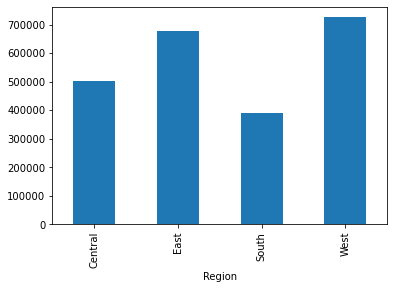

In [12]:
ds.groupby("Region")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='Region'>

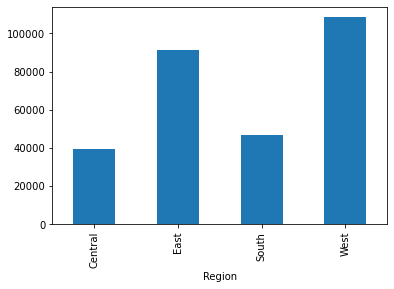

In [13]:
ds.groupby("Region")["Profit"].sum().plot.bar()

In [14]:
#We can see an anomaly here. 
#Though the sales in central region are considerably higher than south the profits are lesser than south.

<AxesSubplot:ylabel='Sales'>

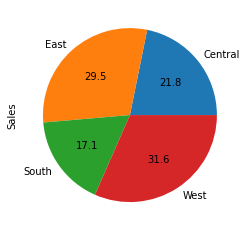

In [15]:
ds.groupby("Region")["Sales"].sum().plot.pie(autopct = "%0.1f")

<AxesSubplot:ylabel='Profit'>

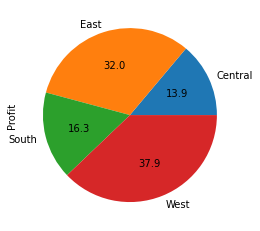

In [16]:
ds.groupby("Region")["Profit"].sum().plot.pie(autopct = "%0.1f")

In [17]:
#On further examining the percentages we do see that though central has greater saless its profits are lower compared to South.